## HeLa Overview
Here we take a look at the HeLa cell runs. See Methods for details on the samples and MS runs.

We check MaxQuant data for comparision with previous publications as well as using FragPipe, a newer and more sensitive quantification pipeline tool.


First, we load the MaxQuant data. Here we want to check the number in each sample identified By MS/MS, as opposed to by matching. To do this, we load the "Identification type" columns.

In [1]:
import load_data

version="txtMQ1.6.7.0"
data_raw = load_data.load_max_quant(version=version, prefix="Identification type",
                                    sample_type="HeLa"#prepended to sample names
                                   )

Here we display the raw data. Note that it yeilds 15 columns, as there are 5 conditions in triplicates. For each protein, these samples are marked as "NaN" to indicate that the protein was not identified, "By matching" to indicate that the protein was identified in that sample only with match between runs, or "By MS/MS" indicating MS/MS identification.

In [2]:
data_raw

,HeLa_0cell_B16,HeLa_0cell_B18,HeLa_0cell_B4,HeLa_10cell_G4,HeLa_10cell_G8,HeLa_10cell_H2,HeLa_150cell_I12,HeLa_150cell_I16,HeLa_150cell_I18,HeLa_1cell_E12,HeLa_1cell_E14,HeLa_1cell_F8,HeLa_500cell_J5,HeLa_500cell_K16,HeLa_500cell_K8
Protein IDs,,,,,,,,,,,,,,,
P10635;A0A087X1C5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,By MS/MS,NaN
P0DPI2;A0A0B4J2D5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,By MS/MS,By MS/MS,NaN
A0A2R8Y619,NaN,NaN,By matching,By matching,By matching,By matching,By matching,By matching,By matching,By matching,By matching,By matching,By MS/MS,By matching,By matching
A0AVT1,NaN,NaN,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS,By MS/MS,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS
A0FGR8,NaN,NaN,NaN,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6N1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,By MS/MS,By MS/MS
Q9Y6N5,NaN,NaN,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS,By MS/MS,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS
Q9Y6W5;Q9UPY6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,By MS/MS,NaN,NaN,NaN,NaN,By MS/MS,By MS/MS,By MS/MS


Here we load functions that will be used.

In [3]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Counts by Sample

Now we can get the number of proteins identified  in each sample.

In [4]:
data_raw.fillna(0, inplace=True)
counts = data_raw.apply(pd.value_counts)
#counts.to_csv('data/AutoPOTS_{0}/protein_counts_byMSMS.csv'.format(version))
counts

,HeLa_0cell_B16,HeLa_0cell_B18,HeLa_0cell_B4,HeLa_10cell_G4,HeLa_10cell_G8,HeLa_10cell_H2,HeLa_150cell_I12,HeLa_150cell_I16,HeLa_150cell_I18,HeLa_1cell_E12,HeLa_1cell_E14,HeLa_1cell_F8,HeLa_500cell_J5,HeLa_500cell_K16,HeLa_500cell_K8
0,3654,3611,3641,2282,2365,2596,1432,1229,1512,3507,3377,3450,328,644,448
By matching,136,148,118,267,358,222,130,111,227,158,262,224,48,59,60
By MS/MS,32,63,63,1273,1099,1004,2260,2482,2083,157,183,148,3446,3119,3314


In [5]:
data_raw.replace("By matching", 0, inplace=True)

Here we visualized that same data for clarity. 

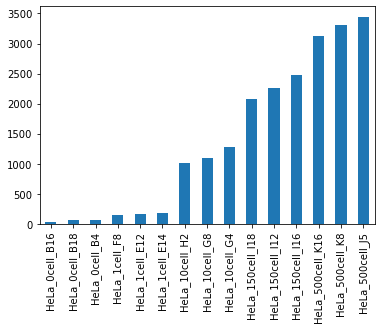

In [6]:
counts.loc["By MS/MS"].sort_values().plot.bar()
plt.show()

Here we declare the sample types, or the conditions. In this case, supernatant only (0 cells), single cell, 10, 150, and 500 cell samples are the conditions. In this version of our functions, the type identifier string has to be in the column name.

In [7]:
cell_types = ['HeLa_0cell','HeLa_1cell','HeLa_10cell','HeLa_150cell','HeLa_500cell']

To improve the bar plot, we will assign a color to each type to make the triplicates more distinct.

In [8]:
colors = ['#0066ff','orange','#0066ff','orange','#0066ff']
samples=np.array(data_raw.columns.values)

color_by_type = []
for cell_type in cell_types:
    cells_of_type = list(s for i,s in enumerate(samples) if cell_type in s)
    for c in cells_of_type:
        color_by_type.append(colors[0])
    colors.pop(0)

Replot with colors and labels.

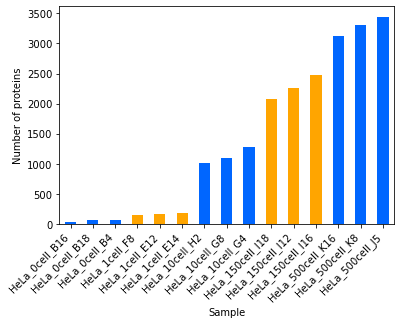

In [9]:
fig = counts.loc["By MS/MS"].sort_values().plot.bar(color=color_by_type)
plt.setp(fig.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.xlabel("Sample")
plt.ylabel("Number of proteins")
plt.show()
#plt.savefig('data/AutoPOTS_{0}/protein_counts_byMSMS.png'.format(version), dpi=300, bbox_inches='tight')

While 500 cells has the highest number of protein groups identified, there is only a small drop going down to 100 cells and 10 HeLa cells is still fairly high. 

### Present in 2/3 replicates

In [10]:
import data_utils

Next, we identify those present by MS/MS in at least 2/3 replicates. This gives us a dataframe with the proteins by sample type with True marked for those proteins present in a type.

In [11]:
present_in = data_raw.apply(data_utils.presence_by_type, cell_types=cell_types, 
                            min_reps=2, null_value=0, axis=1)
present_in

,HeLa_0cell,HeLa_1cell,HeLa_10cell,HeLa_150cell,HeLa_500cell
Protein IDs,,,,,
P10635;A0A087X1C5,False,False,False,False,False
P0DPI2;A0A0B4J2D5,False,False,False,False,True
A0A2R8Y619,False,False,False,False,False
A0AVT1,False,False,False,True,True
A0FGR8,False,False,False,True,True
...,...,...,...,...,...
Q9Y6N1,False,False,False,False,True
Q9Y6N5,False,False,False,True,True
Q9Y6W5;Q9UPY6,False,False,False,False,True


We count the number of proteins present in 2/3 replicates. (The sum of a True/False list is equal to the number of True values as True=1 and False=0) This allows us to summarize and visualize the number in each sample type.

In [12]:
present_in_counts = present_in.apply(sum)
present_in_counts.to_csv('data/AutoPOTS_{0}/proteins_in_2of3_byMSMS.tsv'.format(version), sep='\t')
present_in_counts

HeLa_0cell        39
HeLa_1cell       146
HeLa_10cell     1102
HeLa_150cell    2251
HeLa_500cell    3354
dtype: int64

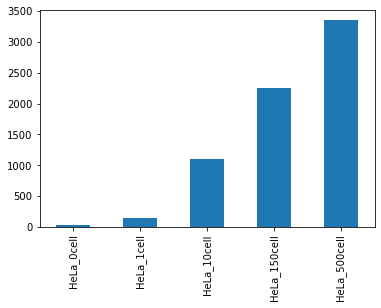

In [13]:
present_in_counts.sort_values().plot.bar()

### Present in 2/3: Venn Diagram Regions
Next, we simplify that <code>present_in</code> matrix for a venn diagram. We reformat it for a specialized venn diagram tool called https://www.meta-chart.com/venn#/your-charts. Python readily creates 2-way or 3-way venn diagrams, but for this 5-way comparison other tools are helpful.

In [14]:
#This function will combine the information for each row. 
#    This allows us to use value_counts to get each section 
#    of the venn diagram.
def concat(row_series):
    str_combined = ""
    for col in row_series.index:
        str_combined = str_combined+"{0}:{1}    ".format(col, row_series[col])
    return str_combined

overlaps = present_in.apply(concat, axis=1)
venn_numbers = overlaps.value_counts()

#Each row of venn_numbers is like this:
#"category":count
#"HeLa_0cell:False    HeLa_1cell:False    HeLa_10cell:False    HeLa_150cell:True    HeLa_500cell:True": 1159

Now we have the venn numbers and can rearrange them for www.meta-chart.com

In [15]:
#Create the new dataframe (empty)
columns=cell_types
rows = list(venn_numbers)
venn_numbers_clean={}
for i in columns:
    venn_numbers_clean[i]=pd.Series(index=list(venn_numbers))
venn_numbers_clean=pd.DataFrame(venn_numbers_clean)

<ipython-input-15-94e7b8747788>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  venn_numbers_clean[i]=pd.Series(index=list(venn_numbers))


In [16]:
# fill in True for the categories that are present
for row in venn_numbers.index:
    count = venn_numbers[row]
    for c in columns:
        present_str = "{0}:True".format(c)
        if (present_str in row):#present in this group
            venn_numbers_clean.loc[count,c]=True

Finally, save out the new matrix. We also display this cleaned venn diagram matrix here.

In [17]:
venn_numbers_clean.to_csv('data/AutoPOTS_{0}/venn_numbers_byMSMS.csv'.format(version))
venn_numbers_clean

,HeLa_0cell,HeLa_1cell,HeLa_10cell,HeLa_150cell,HeLa_500cell
1159,NaN,NaN,NaN,True,True
1113,NaN,NaN,NaN,NaN,True
963,NaN,NaN,True,True,True
406,NaN,NaN,NaN,NaN,NaN
82,NaN,True,True,True,True
22,NaN,NaN,NaN,True,NaN
19,True,True,True,True,True
13,NaN,True,True,NaN,NaN
12,NaN,True,NaN,NaN,NaN
7,True,True,True,NaN,True
